<IPython.core.display.Javascript object>


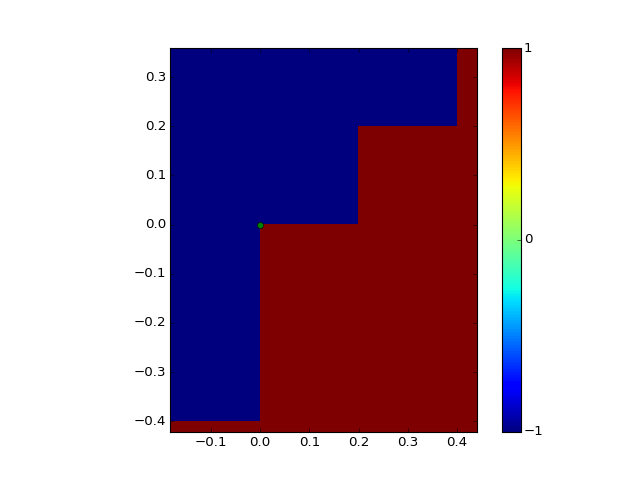

In [55]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib notebook

#gamma
c = 1

#system of ode
def f(t,x):
    return [ x[1], -c * x[1] + x[0] - x[0]**3]

#function for the integration
def Int(t0,x0,y0, t1 = 100):
    r = ode(f).set_integrator('dopri5')
    
    #create 10x10 field for the results
    result = np.zeros((x0[:,0].size,x0[0,:].size,2))
    
    #go through each point and integrate
    for i in range(0,x0[:,0].size):   
        for j in range(0,x0[0,:].size):   
            r.set_initial_value( [x0[i,j], y0[i,j]], t0)
            result[i,j] = r.integrate(r.t+t1)
            
    return result

#create 5x5 meshgrid and calculate for all points the fixed point
X, Y = np.meshgrid(np.arange(-5, 5, .2), np.arange(-5, 5, .2))
Z = Int(0,X,Y,100)

#plot all x-components of Z
fig, ax = plt.subplots()
cax = ax.imshow(Z[:,:,0], extent=[-5, 5, -5, 5], interpolation='none')
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])

# plot fixed points
plt.plot(0,0,'go')
plt.plot(1,0,'ro')
plt.plot(-1,0,'ro')

plt.show()



<IPython.core.display.Javascript object>


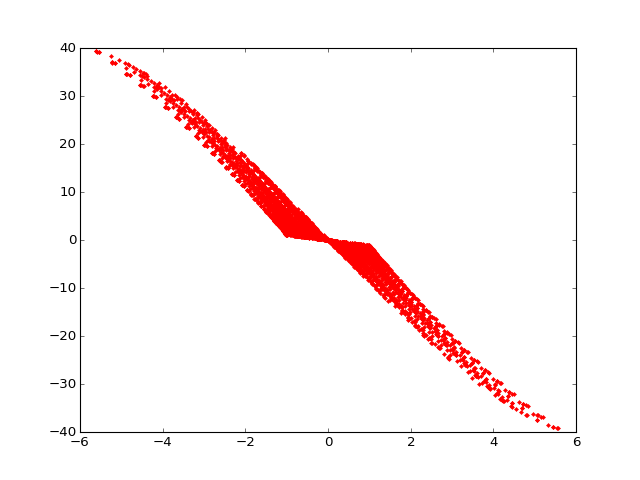

In [127]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

c = 10.0
N = 100

def f(t,x):
    x = x.reshape((N,2))
    temp = np.transpose(np.array([ x[:,1], -c * x[:,1] + x[:,0] - x[:,0]**3]))
    return temp.reshape((2*N))

def Int(t0,x0,style):
    r = ode(f).set_integrator('dopri5')
    r.set_initial_value( x0, t0)
    t1 = -0.4
    dt = -0.01
    
    while r.successful() and r.t > t1:
        temp = r.integrate(r.t+dt).reshape((N,2))
        #print(r.t,temp)
        plt.plot(temp[:,0], temp[:,1],style)

plt.figure()

v = np.array([1,-c/2 - np.sqrt(c**2/4 +1)])
v = v/abs(v)
x = ((np.random.rand(N,1)*2-1)*v).reshape(2*N)
#print x
#x = np.array([1,2,3,4,5,6,7,8])

Int(0,x,'r.')
#Int(0,[0,2],'bo')
#Int(0,[2,0],'go')
#Int(0,[3,0],'yo')
plt.show()

In [114]:
v = np.array([1,2])
x = np.ones((10,1))
bla = x*v
shaped = bla.reshape(20)
shaped.reshape(10,2)


array([[ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.]])